#### Import Packages

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/supervised-learning/blob/main/classification/naive-bayes-classifier/naive_bayes_mushroom.ipynb)



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plot
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plots.
import seaborn as sns
import math
from sklearn.naive_bayes import MultinomialNB # for naive bayes classifier
from sklearn.preprocessing import LabelEncoder  # for converting string values to numeric/ordinal values in colum
from sklearn.model_selection import train_test_split  # splitting dataset in train test data
from sklearn import metrics  # for accuracy computation
from IPython.display import display

In [2]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-api-python-client==2.22.0
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-auth google-auth-oauthlib google-auth-httplib2
%pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
import warnings
warnings.filterwarnings("ignore")
url = 'https://drive.google.com/uc?id=1rSbD3pI0rlaz3m1pjmFsu4ycdsX4qXBb'
output = 'agaricus-lepiota.data'
gdown.download(url, output, quiet=False, verify=False)

You should consider upgrading via the '/home/nitesh/env/dev37/python37/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1rSbD3pI0rlaz3m1pjmFsu4ycdsX4qXBb
To: /home/nitesh/env/dev37/repos/supervised-learning/classification/naive-bayes-classifier/agaricus-lepiota.data
100%|██████████| 374k/374k [00:00<00:00, 1.22MB/s]


'agaricus-lepiota.data'

#### Read dataset and data preparation

In [3]:

"Read the mushroom data and assign feature names"

md = pd.read_csv("agaricus-lepiota.data", header = None)
%rm "agaricus-lepiota.data"

# Dataset contains 23 species of gilled mushrooms in the Agaricus and Lepiota Family
# Classes are edible represented as "e" and poisonous represented as "p" in 0th column.
# Shape of dataset is (8124 observations with 23 features(including class feature))

# Get column names from the provided file 'agaricus-lepiota.names' -
md.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
print("Mushroom Dataset top two rows:\n")
display(md)

X_nb = md[md.columns[1:]] 
y_nb = md[md.columns[0:1]]

X_nb_cols = list(X_nb.columns)
le = LabelEncoder() 

X_nb[X_nb_cols] = X_nb[X_nb_cols].apply(lambda x_nb_col: le.fit_transform(x_nb_col))
y_nb = le.fit_transform(y_nb)
y_nb = pd.DataFrame(y_nb)

"join two dataframes and name it as md_nb containing all string converted to numeric values"
md_nb = y_nb.join(X_nb)
md_nb=md_nb.rename(columns = {0:'class'}) # rename column 0 name with 'class'
display(md_nb)

"split data column wise & generate predictors values array and response feature"
predictors_nb = md_nb[md_nb.columns[1:]].values
response_nb = md_nb['class']

"split in train and test data. use random state = pg id 11915048, test size = 30%; train size = 70%"
predictors_train_nb, predictors_test_nb, response_train_nb, response_test_nb = train_test_split(predictors_nb, response_nb, test_size=0.3, random_state=11915048)

print("\n")
print("predictors_train_nb shape:", predictors_train_nb.shape)
print("predictors_test_nb shape:", predictors_test_nb.shape)
print("response_train_nb shape:", response_train_nb.shape)
print("response_test_nb shape:", response_test_nb.shape)

Mushroom Dataset top two rows:



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2




predictors_train_nb shape: (5686, 22)
predictors_test_nb shape: (2438, 22)
response_train_nb shape: (5686,)
response_test_nb shape: (2438,)


#### Naive-bayes model and prediction on train and test data

In [4]:
"generate lambda ranging from 0 to 50"
lambda_hyperparameter= []
for i in range(51):
    lambda_hyperparameter.append(i) # it will generate a list of lambda values ranging from 0 to 50.
lambda_hyperparameter

"obtain train and test accuracies"
test_accuracy_nb = []
train_accuracy_nb = []
for l in lambda_hyperparameter:
    nb_classifier = MultinomialNB(alpha= l, fit_prior=True, class_prior=None)
    nb_classifier.fit(predictors_train_nb, response_train_nb)
    response_predicted_nb = nb_classifier.predict(predictors_test_nb) # predict on test data
    test_acc_nb = metrics.accuracy_score(response_test_nb,response_predicted_nb)
    test_accuracy_nb.append(test_acc_nb)  # test accuracy
    predictors_predicted_nb = nb_classifier.predict(predictors_train_nb) # predict on train data
    train_acc_nb =metrics.accuracy_score(response_train_nb, predictors_predicted_nb) 
    train_accuracy_nb.append(train_acc_nb) # train accuracy
    
nb_accuracy_measure = pd.DataFrame({'train_accuracy': train_accuracy_nb, 'test_accuracy': test_accuracy_nb}, index = lambda_hyperparameter, copy = False)
print(nb_accuracy_measure) 
print("\n")

    train_accuracy  test_accuracy
0         0.805663       0.817473
1         0.805487       0.817063
2         0.805487       0.817063
3         0.805487       0.817063
4         0.805311       0.817063
5         0.805311       0.817063
6         0.805311       0.817063
7         0.805487       0.817063
8         0.805487       0.817063
9         0.805663       0.816243
10        0.805663       0.816243
11        0.805311       0.816243
12        0.804960       0.816243
13        0.804784       0.815833
14        0.804960       0.815833
15        0.804960       0.815833
16        0.804784       0.815422
17        0.804608       0.815422
18        0.804608       0.815422
19        0.804608       0.815012
20        0.804608       0.815012
21        0.804608       0.815012
22        0.804432       0.815012
23        0.804432       0.815012
24        0.804432       0.815012
25        0.804432       0.815012
26        0.804432       0.815422
27        0.804432       0.815012
28        0.80

#### Line Plot - Lambda vs train and test accuracy

best lambda after which test accuracies starts to decrease:
 8


''

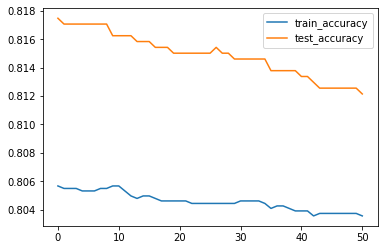

In [5]:
"line plot-> x = lambda; y = train data accuracy , test data accuracy"
nb_accuracy_measure.plot.line()


"lambda value where test accuracies starts to decrease"
nb_accuracy_measure['testdummy'] = nb_accuracy_measure['test_accuracy'].diff()
nb_bestlambda = nb_accuracy_measure[nb_accuracy_measure['testdummy'] == nb_accuracy_measure['testdummy'].min()].index

print("best lambda after which test accuracies starts to decrease:\n", nb_bestlambda[0]-1)
''''''
#best lambda index = 8 post which test accuracies starts to decrease.

Increasing the lambda hyper parameter value(i.e. alpha value or smoothing parameter),model accuracy falls down. 
<br>
Then reason of this is the higher values of lambda increases overall value in the denominator part while computing the probability of datapoint given class ( in conditional probability part).

We observe that decision tree classifier yields better accuracies when compared to Naive Bayes algorithm. As the size threshold increases in Decision tree classifier, accuracy starts to drop down since higher size threshold accounts to reduced tree size and therefore it reduces the purity in the nodes.
On the other hand, Naive Bayes algorithm performs poor because it could not handle complexities in data very well i.e. large number of features and the likelihood is distributed